In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-stock-data-2025/AMZN_1997-05-15_2025-02-21.csv


In [6]:
df=pd.read_csv("/kaggle/input/amazon-stock-data-2025/AMZN_1997-05-15_2025-02-21.csv")
df.head(10)

,date,open,high,low,close,adj_close,volume
0,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
5,1997-05-22 00:00:00-04:00,0.071875,0.072396,0.065625,0.069792,0.069792,235536000
6,1997-05-23 00:00:00-04:00,0.070313,0.076042,0.066667,0.075000,0.075000,318744000
7,1997-05-27 00:00:00-04:00,0.075521,0.082292,0.072917,0.079167,0.079167,173952000
8,1997-05-28 00:00:00-04:00,0.081250,0.081771,0.076563,0.076563,0.076563,91488000
9,1997-05-29 00:00:00-04:00,0.077083,0.077083,0.073958,0.075260,0.075260,69456000


In [7]:
df.shape

(6986, 7)

In [8]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6986 entries, 0 to 6985
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       6986 non-null   object 
 1   open       6986 non-null   float64
 2   high       6986 non-null   float64
 3   low        6986 non-null   float64
 4   close      6986 non-null   float64
 5   adj_close  6986 non-null   float64
 6   volume     6986 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 382.2+ KB


In [14]:
df['date'] = pd.to_datetime(df['date'], utc=True)


In [15]:
df.dtypes


date         datetime64[ns, UTC]
open                     float64
high                     float64
low                      float64
close                    float64
adj_close                float64
volume                     int64
dtype: object

In [1]:
df = df.sort_values('date')


NameError: name 'df' is not defined

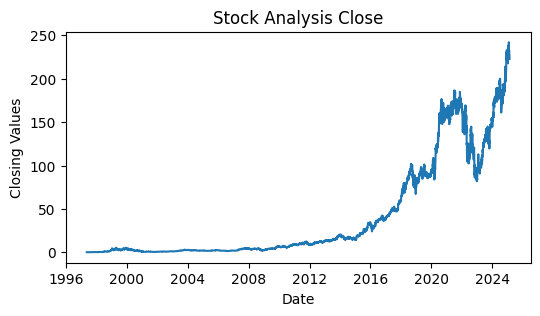

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
plt.plot(df['date'],df['close'])
plt.title("Stock Analysis Close")
plt.xlabel("Date")
plt.ylabel("Closing Values",)
plt.show()

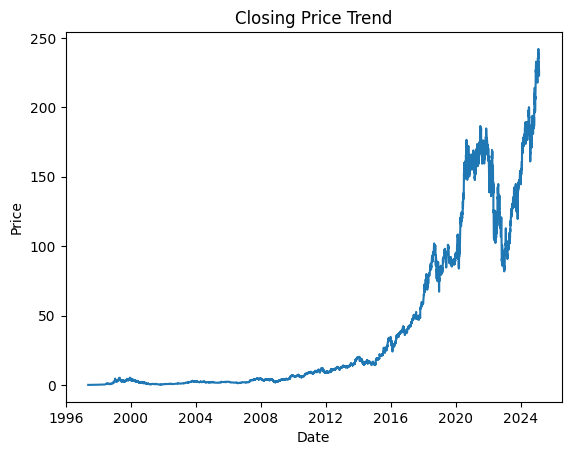

In [4]:
plt.plot(df['date'], df['close'])
plt.title("Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


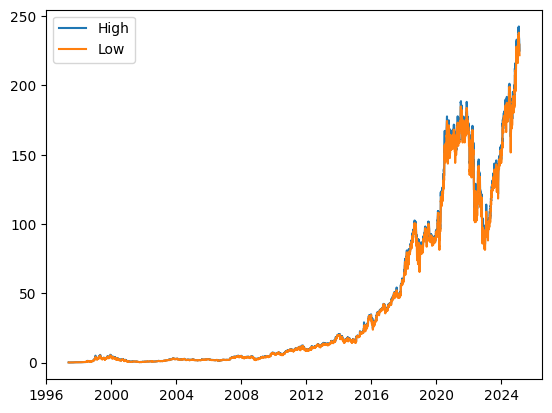

In [5]:
plt.plot(df['date'], df['high'], label='High')
plt.plot(df['date'], df['low'], label='Low')
plt.legend()
plt.show()


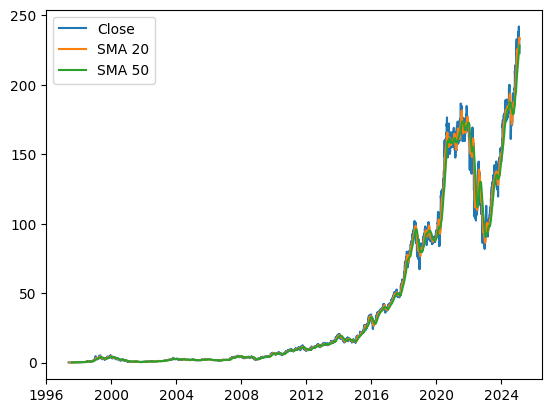

In [6]:
df['SMA_20'] = df['close'].rolling(20).mean()
df['SMA_50'] = df['close'].rolling(50).mean()

plt.plot(df['date'], df['close'], label='Close')
plt.plot(df['date'], df['SMA_20'], label='SMA 20')
plt.plot(df['date'], df['SMA_50'], label='SMA 50')
plt.legend()
plt.show()


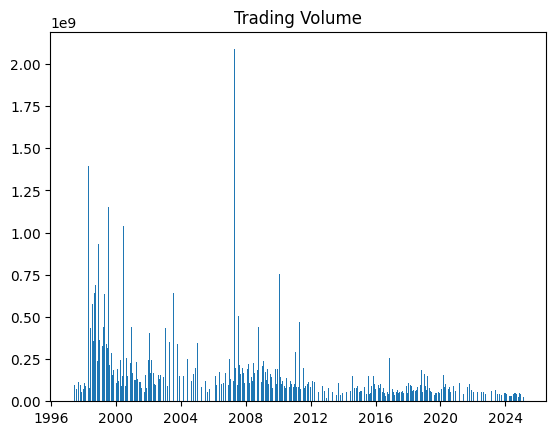

In [7]:
plt.bar(df['date'], df['volume'])
plt.title("Trading Volume")
plt.show()


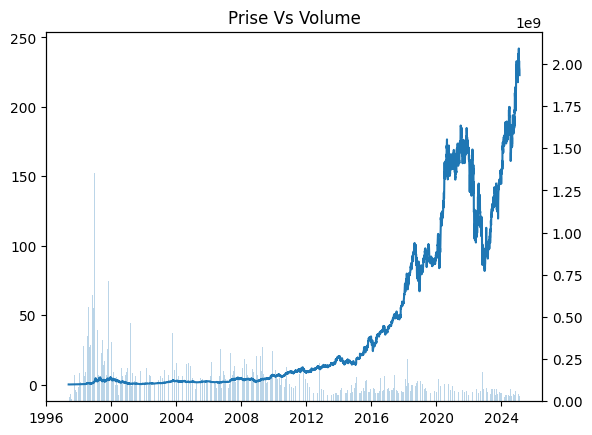

In [18]:
fig, ax1 = plt.subplots()

ax1.plot(df['date'], df['close'])
ax2 = ax1.twinx()
ax2.bar(df['date'], df['volume'], alpha=0.3)
plt.title('Prise Vs Volume')
plt.show()


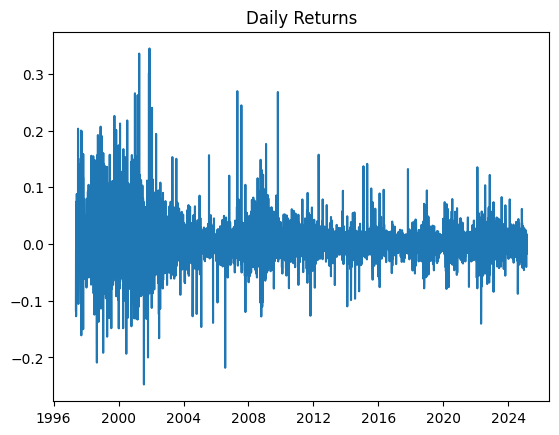

In [9]:
df['daily_return'] = df['close'].pct_change()

plt.plot(df['date'], df['daily_return'])
plt.title("Daily Returns")
plt.show()


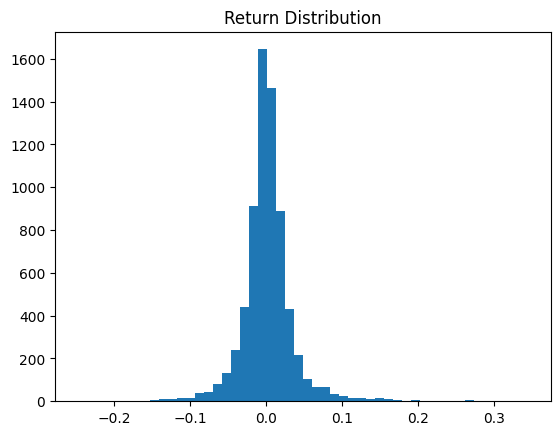

In [10]:
plt.hist(df['daily_return'], bins=50)
plt.title("Return Distribution")
plt.show()


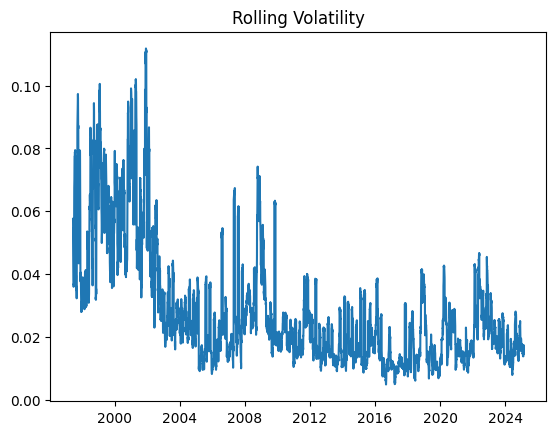

In [11]:
df['volatility'] = df['daily_return'].rolling(20).std()

plt.plot(df['date'], df['volatility'])
plt.title("Rolling Volatility")
plt.show()


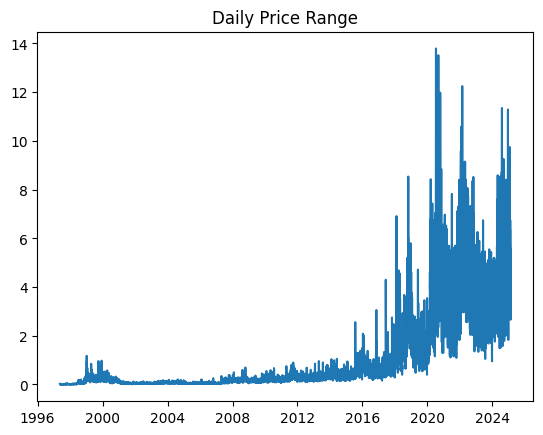

In [12]:
df['range'] = df['high'] - df['low']
plt.plot(df['date'], df['range'])
plt.title("Daily Price Range")
plt.show()


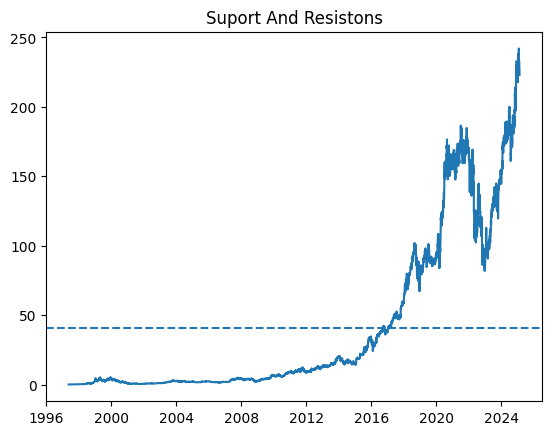

In [17]:
plt.plot(df['date'], df['close'])
plt.axhline(df['close'].mean(), linestyle='--')
plt.title('Suport And Resistons')
plt.show()